# Aggregation Dataset

Gionis, A., H. Mannila, and P. Tsaparas, Clustering aggregation. ACM Transactions on Knowledge Discovery from Data (TKDD), 2007. 1(1): p. 1-30.

source: http://cs.joensuu.fi/sipu/datasets/

## Read the data and import clustering methods

In [1]:
import pandas as pd

from matplotlib.colors import to_hex
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#!pip install bk_clustering
import bk_clustering
from bk_clustering import BurjKhalifaClustering

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

In [4]:
dataset_url = "https://raw.githubusercontent.com/IvanReznikov/bk_clustering/main/data/examples_csv/aggregation.csv"

In [5]:
df = pd.read_csv(dataset_url, header=None)
df.columns = ['x', 'y', 'class']
X, true_labels = df[['x', 'y']], df['class']
_xarr, _yarr = X["x"], X["y"]

## Clustering

In [6]:
bk_model = BurjKhalifaClustering(n_clusters=true_labels.nunique())
bk_model.fit(X)
bk_model_labels_set = list(set(bk_model.labels_))

In [7]:
agg_model = AgglomerativeClustering(n_clusters=true_labels.nunique()).fit(X)
kmeans_model = KMeans(n_clusters=true_labels.nunique(), random_state=0).fit(X)
gmm_model_labels = GaussianMixture(n_components=true_labels.nunique(), random_state=0).fit_predict(X)

/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualization

In [8]:
color_map_hex = [to_hex(col) for col in mpl.colormaps["tab20"].colors]

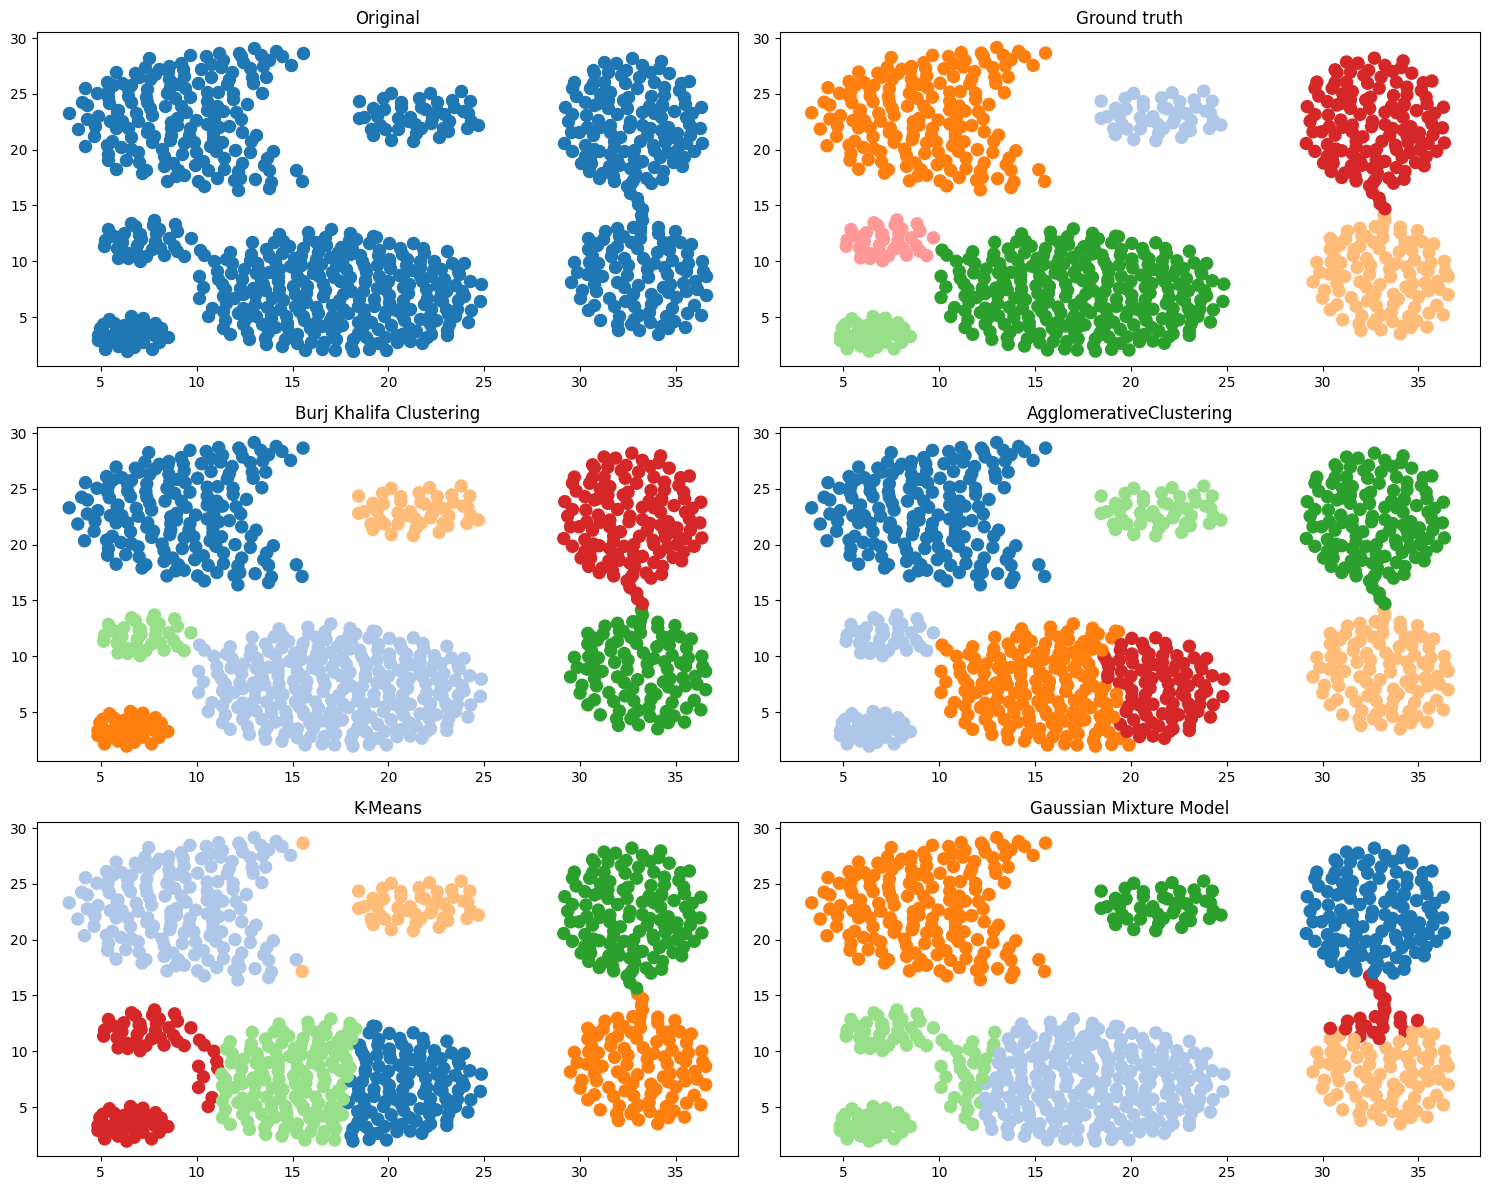

In [9]:

fig, axs = plt.subplots(3, 2, figsize=(15, 12))
# define custom color map - need to handle 100% of fails
cmap = "tab10"
axs[0, 0].scatter(_xarr, _yarr, s=75)
axs[0, 0].set_title("Original")

axs[0, 1].scatter(
    _xarr, _yarr, s=75, c=[color_map_hex[x] for x in true_labels]
)
axs[0, 1].set_title("Ground truth")

axs[1, 0].scatter(
    _xarr, _yarr, s=75, c=[color_map_hex[bk_model_labels_set.index(x)] for x in bk_model.labels_]
)
axs[1, 0].set_title("Burj Khalifa Clustering")

axs[1, 1].scatter(
    _xarr, _yarr, s=75, c=[color_map_hex[x] for x in agg_model.labels_]
)
axs[1, 1].set_title("AgglomerativeClustering")

axs[2, 0].scatter(
    _xarr, _yarr, s=75, c=[color_map_hex[x] for x in kmeans_model.labels_]
)
axs[2, 0].set_title("K-Means")

axs[2, 1].scatter(
    _xarr, _yarr, s=75, c=[color_map_hex[x] for x in gmm_model_labels]
)
axs[2, 1].set_title("Gaussian Mixture Model")

fig.tight_layout()
plt.show()